## Contrôle continue - Classification

In [2]:
import pandas as pd
import seaborn as sns 
import numpy as np

In [3]:
df = pd.read_csv('smoking_diseases_risk.csv')

In [4]:
df.head()

,Age,SEX,smok_duration(years),PA,weight,Blod_group,Risk
0,52,H,23,18.0,79,AB,Yes
1,32,H,7,13.0,100,B,No
2,30,F,13,10.0,82,B,No
3,62,F,18,10.0,87,B,Yes
4,62,H,2,12.0,79,AB,No


## Prétraitement

In [5]:
df.isnull().values.any()

True

In [6]:
df.replace('?', np.nan, inplace= True)

In [7]:
df.isnull().sum()

Age                        0
SEX                        0
smok_duration(years)       0
PA                      1104
weight                     0
Blod_group                 0
Risk                       0
dtype: int64

In [8]:
df['PA'] = df['PA'].fillna((df['PA'].median()))

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['SEX'] = encoder.fit_transform(df['SEX'])
df['Blod_group'] = encoder.fit_transform(df['Blod_group'])
df['Risk'] = encoder.fit_transform(df['Risk'])

In [11]:
df.isnull().sum()

Age                     0
SEX                     0
smok_duration(years)    0
PA                      0
weight                  0
Blod_group              0
Risk                    0
dtype: int64

In [12]:
df.head()

,Age,SEX,smok_duration(years),PA,weight,Blod_group,Risk
0,52,1,23,18.0,79,1,1
1,32,1,7,13.0,100,2,0
2,30,0,13,10.0,82,2,0
3,62,0,18,10.0,87,2,1
4,62,1,2,12.0,79,1,0


In [13]:
corr = df.corr()


<AxesSubplot:>

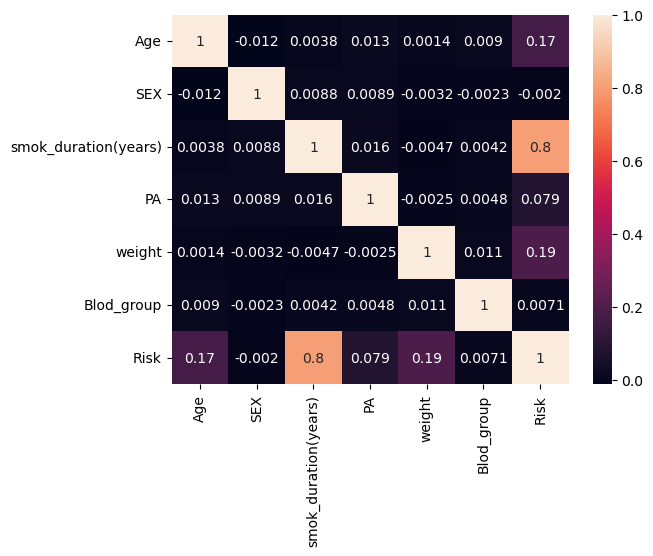

In [14]:
sns.heatmap(corr,vmax=1 , annot=True)

In [15]:
df.columns

Index(['Age', 'SEX', 'smok_duration(years)', 'PA', 'weight', 'Blod_group',
       'Risk'],
      dtype='object')

In [16]:
x=df[['Age', 'SEX', 'smok_duration(years)', 'PA', 'weight', 'Blod_group']]

In [17]:
y=df[['Risk']]

## Training

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2 )

In [20]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [21]:
y_train['Risk'].values.shape

(9744,)

In [22]:
nb.fit(x_train,y_train['Risk'].values)

GaussianNB()

## Evaluation

In [23]:
from sklearn.metrics import confusion_matrix, f1_score, recall_score, accuracy_score, precision_score

In [24]:
y_pred = nb.predict(x_test)

In [25]:
nb.score(x_test,y_test['Risk'].values)


0.9183422240459581

In [26]:
confusion_matrix(y_test,y_pred)

array([[1224,   91],
       [ 108, 1014]], dtype=int64)

In [29]:
print("F1_score", f1_score(y_pred,y_test))
print("Accuracy ", accuracy_score(y_pred,y_test))
print("Recall ", recall_score(y_pred,y_test))
print("Precision ", precision_score(y_pred,y_test))



F1_score 0.9106421194431971
Accuracy  0.9183422240459581
Recall  0.9176470588235294
Precision  0.9037433155080213


,Age,SEX,smok_duration(years),PA,weight,Blod_group
8931,63,0,16,14.0,94,1
11765,61,1,19,10.0,66,0
450,66,1,16,18.0,61,2
7913,34,1,15,14.0,90,1
10547,68,0,24,14.0,102,0
...,...,...,...,...,...,...
6549,58,0,14,8.0,73,1
7401,65,0,8,11.0,93,1
10490,48,0,3,8.0,93,0
11428,52,1,17,10.0,78,1


## Créer une fonction de prédiction  class = f(entrée)

In [31]:
def prediction_class(matrice):
     y_prediction  = nb.predict(matrice)
     Y_new_pred = np.where(y_prediction==0, 'No', 'Yes')
     return Y_new_pred




array(['No'], dtype='<U3')

In [32]:
valeur_a_predire=x.iloc[1:2]
prediction_class(valeur_a_predire)

array(['No'], dtype='<U3')